# Three-way merge sort

In [2]:
# Three-way merge sort
def three_way_merge_sort(A):
    
    n=len(A)
    if n==0 or n==1:
        #base case
        return A
    
    else:
        #divide
        #q is the first middle index, r is the second middle index
        if n%3 == 0:
            q = int(n/3)
            r = 2*q
        else:
            q = n//3
            r = 2*q+1
        
        #divide A into three parts, sort them by recursive calls and add sentinel
        sentinel=float('inf')
        
        LEFT=three_way_merge_sort(A[:q])
        LEFT.append(sentinel)
        MIDDLE=three_way_merge_sort(A[q:r])
        MIDDLE.append(sentinel)
        RIGHT=three_way_merge_sort(A[r:])
        RIGHT.append(sentinel)
        
        #combine
        #sentinel is needed for loop to not get out of index, when one stack is already empty
        #check for lowest elements in all three decks, remove it by pop()
        for i in range(n):
            A[i] = min(LEFT[0],MIDDLE[0],RIGHT[0])
            if A[i] == LEFT[0]:
                LEFT.pop(0)
            elif A[i] == MIDDLE[0]:
                MIDDLE.pop(0)
            else:
                RIGHT.pop(0)

    return A

#three test cases for code
list1=[24,1,3,27,17,89,43,65,22,33,65,12,34,9,0]
list2=[76,32,1,24,3,5,7,123,45,64,23,61,13,32,28]
list3=[12,54,1,2,3,6,4,8,154,17,5,7,87,98,23,22,41]

list1= three_way_merge_sort(list1)
list2= three_way_merge_sort(list2)
list3=three_way_merge_sort(list3)
print(list1, '\n',list2,'\n',list3)

[0, 1, 3, 9, 12, 17, 22, 24, 27, 33, 34, 43, 65, 65, 89] 
 [1, 3, 5, 7, 13, 23, 24, 28, 32, 32, 45, 61, 64, 76, 123] 
 [1, 2, 3, 4, 5, 6, 7, 8, 12, 17, 22, 23, 41, 54, 87, 98, 154]


# Three-way merge sort with insertion sort under size k

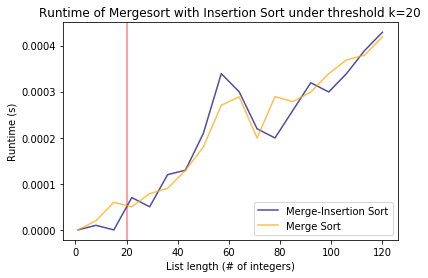

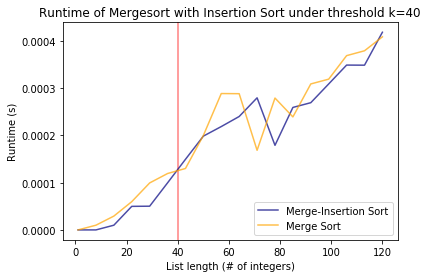

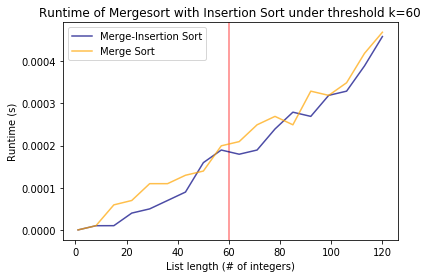

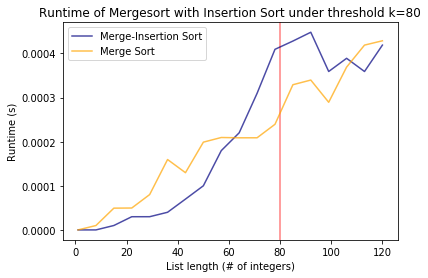

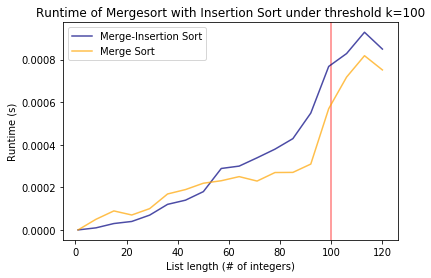

In [8]:
import random
import time
import matplotlib.pyplot as plt

def insertion_sort(A):
    for i in range(1, len(A)):
        j = i
        while j > 0 and A[j - 1] > A[j]:
            A[j - 1], A[j] = A[j], A[j - 1]
            j -= 1

# Three-way merge sort with insertion under the threshold k
def merge3_insert(A,k):
    n=len(A)
    if n==0 or n==1:
        #base case
        return A
    
    elif n<=k:
        insertion_sort(A)
    
    else:
        #divide
        #q is the first middle index, r is the second middle index
        if n%3 == 0:
            q = int(n/3)
            r = 2*q
        else:
            q = n//3
            r = 2*q+1
        
        #divide A into three parts, sort them by recursive calls and add sentinel
        sentinel=float('inf')
        
        LEFT=three_way_merge_sort(A[:q])
        LEFT.append(sentinel)
        MIDDLE=three_way_merge_sort(A[q:r])
        MIDDLE.append(sentinel)
        RIGHT=three_way_merge_sort(A[r:])
        RIGHT.append(sentinel)
        
        #combine
        #sentinel is needed for loop to not get out of index, when one stack is already empty
        #check for lowest elements in all three decks, remove it by pop()
        for i in range(n):
            A[i] = min(LEFT[0],MIDDLE[0],RIGHT[0])
            if A[i] == LEFT[0]:
                LEFT.pop(0)
            elif A[i] == MIDDLE[0]:
                MIDDLE.pop(0)
            else:
                RIGHT.pop(0)

    return A

#2d scatterplots, where x=list length, y=runtime for different values of k
def plot_merge(k):
    x=[]
    y=[]
    y2=[]
    for i in range(1,125,7):
        temp=[]
        temp2=[]
        #average results for 100 tries
        for j in range(100):
            list1=random.sample(range(10**3),i)
            start_time = time.time()
            merge3_insert(list1,k)
            temp.append(time.time() - start_time)
            start_time = time.time()
            three_way_merge_sort(list1)
            temp2.append(time.time() - start_time)
        x.append(i)
        y.append(sum(temp)/len(temp))
        y2.append(sum(temp2)/len(temp2))
    plt.axvline(x=k,color='red', alpha=0.5)
    plt.xlabel("List length (# of integers)")
    plt.ylabel("Runtime (s)")
    title='Runtime of Mergesort with Insertion Sort under threshold k='+str(k)
    plt.title(title)
    plt.plot(x, y, color='navy', alpha=0.7,label="Merge-Insertion Sort")
    plt.plot(x, y2, color='orange',alpha=0.7,label="Merge Sort")
    plt.legend()
    plt.show()

plot_merge(20)
plot_merge(40)
plot_merge(60)
plot_merge(80)
plot_merge(100)

## Appropriate Size of *k*
Since the complexity of `three_way_merge_sort`, as explained below, is $\Theta(nlogn)$. While this function's runtime complexity does not depend on how well the array was ordered, `insertion_sort`'s does. Its best case runtime is $\Omega(n)$, while its worst is $O(n^2)$. However, `insertion_sort` is a simpler algorithm, with less steps, therefore it would make sense to perform it instead of the recursive merging under certain list lengths $k$.

In the above graphs, I have been testing for what might be the best threshold for k. We ideally would like to stop before `insertion_sort` really presents its polynomial behaviour, and starts to perform worse than `three_way_merge_sort`. As we can see this happens somewhere after $k=60$. So on average $k<60$ will give us better results than the `three_way_merge_sort`.

#  Complexity Analysis

## Three-way merge
The recursive nature of `three_way_merge_sort` suggests that input size should not effect its runtime complexity. We can illustrate this by drawing on the algorithm's divide and conquer nature.
1. **DIVIDE**: We compute the two midpoints for each array, which step take should take a constant time.
2. **CONQUER**: Recursively sort three subarrays of size $n/3$. 
3. **COMBINE**: This step takes $n$ elements and merges them within a single loop. Thus it is bound by $\Theta(n)$ time.

Since for steps 1 and 3, step 3 $\Theta(n)$ is higher, we may take it to take $\Theta(n)$ time in total. Suppose that it is $cn$ for some constant $c$. Now, if we imagine the recursion problem as a tree, we will notice that for the second level the problem will call on **COMBINE** for 3 subarrays of length $n/3$. We can describe this step as $3(cn/3)=cn$. The next level would be $9(cn/9)=cn$. Following this pattern we get that any level should be $cn$. The height of the tree is determined by the division $n/3$, thus we will have $log_3(n)+1$ levels. Thus our overall complexity should be bound by $log_3(n)(cn)$,  thus $\Theta(nlogn)$.

## Three-way merge with insertion
As discussed above, `insertion sort`'s complexity depends on how much the input is already in an order. A completely reverse order set results in a complexity of $O(n^2)$. However, when determining the appropriate value for threshold $k$, below which it is worth implementing an insertion sort, we are talking about list lengths in which the quadratic growth of complexity is outweighed by the algorithm's relative simplicity compared to `three_way_merge_sort`.

In this case `merge3_insert` would have a complexity of: $k^2c_1n +log_3(n-k)c_2n$ for insertion threshold $k$ and some constants $c1$ and $c2$, where ($c1<c2$). In comparison `three_way_merge_sort` would have a complexity of $log_3(n)(c_2n)$. Therefore, we expect `merge3_insert` for small list sizes to perform slightly better.

## Two-way merge sort
The comparison to `two_way_merge_sort` should be `three_way_merge_sort`. They have the same complexity of $\Theta(nlogn)$. The difference between them lies in what way they split lists recursively. While `three_way_merge_sort` has an advantage, with only $log_3(n)+1$ levels of recursion compared to `two_way_merge_sort`'s $log_2(n)+1$ levels, the three-way comparison between stacks requires more steps and thus weighs out the advantage provided by less levels in smaller list lengths.

Thus I expect `two_way_merge_sort` to perform  better until a certain list length, where `three_way_merge_sort` will have the upper hand.

## Graphs
Below I have created two plots, one for smaller and one for larger list lenghts. While the distinctions between the runtimes of my graphs are a little difficult to make out, they confirm my assumptions made above, which can be summarised as:

**Runtime Estimate for Small Lists**: `merge3_insert`<`two_way_merge_sort`<`three_way_merge_sort`

**Runtime Estimate for Large Lists**: `merge3_insert`<`three_way_merge_sort`<`two_way_merge_sort`


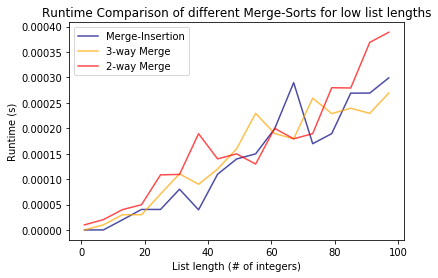

In [9]:
def two_way_merge_sort(A):    
    n=len(A)
    if n==0 or n==1:
        #base case
        return A
    
    else:
        q=n//2
        
        #divide A into two parts, sort them by recursive calls and add sentinel
        sentinel=float('inf')
        
        LEFT=three_way_merge_sort(A[:q])
        LEFT.append(sentinel)
        RIGHT=three_way_merge_sort(A[q:])
        RIGHT.append(sentinel)
        
        #combine
        #sentinel is needed for loop to not get out of index, when one stack is already empty
        #check for lowest elements in all three decks, remove it by pop()
        for i in range(n):
            A[i] = min(LEFT[0],RIGHT[0])
            if A[i] == LEFT[0]:
                LEFT.pop(0)
            else:
                RIGHT.pop(0)

    return A

#PLOT 1, showing behaviour  for lower list lengths
k=50 #value satisfies k<60
x=[]
y=[]
y2=[]
y3=[]
for i in range(1,100,6):
    temp=[]
    temp2=[]
    temp3=[]
    #average results for 10 tries
    for j in range(100):
        list1=random.sample(range(10**3),i)
        #merge3_insert
        start_time = time.time()
        merge3_insert(list1,k)
        temp.append(time.time() - start_time)
        #three_way_merge
        start_time = time.time()
        three_way_merge_sort(list1)
        temp2.append(time.time() - start_time)
        #two_way_merge
        start_time = time.time()
        two_way_merge_sort(list1)
        temp3.append(time.time() - start_time)
    x.append(i)
    y.append(sum(temp)/len(temp))
    y2.append(sum(temp2)/len(temp2))
    y3.append(sum(temp3)/len(temp3))
plt.xlabel("List length (# of integers)")
plt.ylabel("Runtime (s)")
title='Runtime Comparison of different Merge-Sorts for low list lengths'
plt.title(title)
plt.plot(x, y, color='navy', alpha=0.7,label="Merge-Insertion")
plt.plot(x, y2, color='orange',alpha=0.7,label="3-way Merge")
plt.plot(x, y3, color='red',alpha=0.7,label="2-way Merge")
plt.legend()
plt.show()

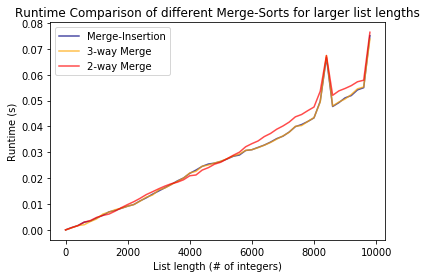

In [10]:
#PLOT 1, showing behaviour  for lower list lengths
k=50 #value satisfies k<60
x=[]
y=[]
y2=[]
y3=[]
for i in range(1,10000,200):
    temp=[]
    temp2=[]
    temp3=[]
    #average results for 50 tries
    for j in range(20):
        list1=random.sample(range(10**5),i)
        #merge3_insert
        start_time = time.time()
        merge3_insert(list1,k)
        temp.append(time.time() - start_time)
        #three_way_merge
        start_time = time.time()
        three_way_merge_sort(list1)
        temp2.append(time.time() - start_time)
        #two_way_merge
        start_time = time.time()
        two_way_merge_sort(list1)
        temp3.append(time.time() - start_time)
    x.append(i)
    y.append(sum(temp)/len(temp))
    y2.append(sum(temp2)/len(temp2))
    y3.append(sum(temp3)/len(temp3))
plt.xlabel("List length (# of integers)")
plt.ylabel("Runtime (s)")
title='Runtime Comparison of different Merge-Sorts for larger list lengths'
plt.title(title)
plt.plot(x, y, color='navy', alpha=0.7,label="Merge-Insertion")
plt.plot(x, y2, color='orange',alpha=0.7,label="3-way Merge")
plt.plot(x, y3, color='red',alpha=0.7,label="2-way Merge")
plt.legend()
plt.show()

# HC-comments

**#optimalalgorithm:** Finding the optimal threshold for `merge3_insert` required me to provide a deep analysis on the workings of both the merge sort and the insertion sort algorithms. I explained and consequently illustrated the advantage of insertion sort with smaller list lengths, and how a higher complexity can under certain circumstances outweigh an algorithm of lower complexity but with higher steps.

**#complexity:** I provided an asymptotic analysis of `three_way_merge_sort`, where I built upon the algorithm's divide and conquer nature to derive the complexity. I also analysed `merge3_insert`and `two_way_merge_sort`, and provided a justified estimate for their comparative performance at small and large list lengths. I evaluated the estimate averaging runtimes and creating illustrative plots.

**#sort:** Throughout my code I added comments to support and justify my steps for how the sorting algorithms were constructed. Also, when analysing the complexity and estimating the runtime of the three sorting algorithms in question, I provided a clear and detailed account as to what situations would favour a sort over another.

**#optimization:** I provided a clear explanation on how the $k$ threshold problem is an optimisation problem, and how we might go about solving it. Additionally I created plots for different values of $k$, and consequently reasoned from those plots to solve this optimization problem.

**#optimization:** I provided a clear explanation on how the $k$ threshold problem is an optimisation problem, and how we might go about solving it. Additionally I created plots for different values of $k$, and consequently reasoned from those plots to solve this optimization problem.

**#algorithms:** For multiple aspects of this assingment, such as implementing a three-way merging algorithm to capturing runtime or plotting graphs, I devised appropriate algorithmic solutions in terms of functions that allowed me to complete this assignment. I made sure to comment and explain my thinking on how I broke down the problem and solved it in parts.